In [226]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [227]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [228]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [229]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [230]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [231]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [232]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [233]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [234]:
# Find the most recent date in the data set.
first_row_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
first_row_date[0]

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

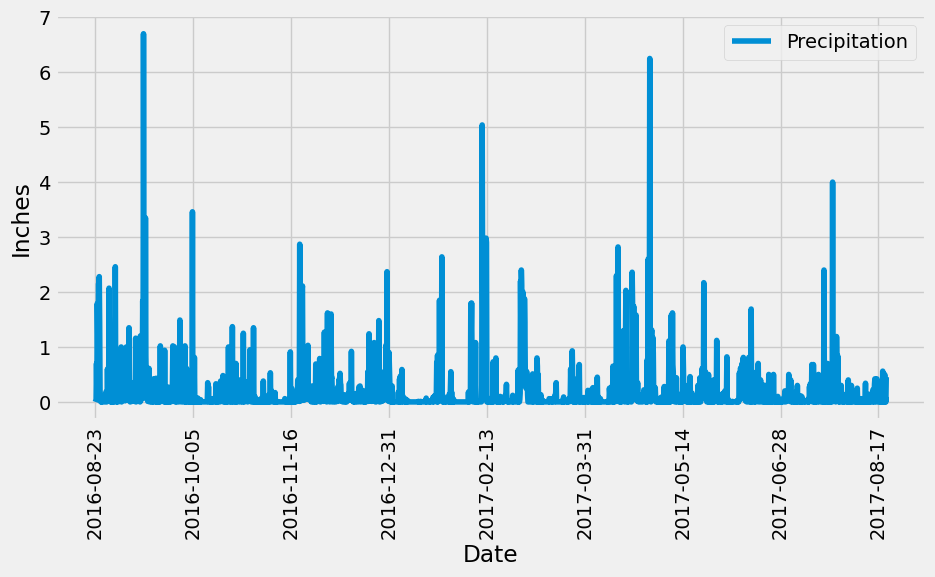

In [235]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(first_row_date[0], '%Y-%m-%d').date()-dt.timedelta(days=365)
print(f"12 months prior to most recent data entry: {year_ago}")

# Perform a query to retrieve the data and precipitation scores
rain_date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.prcp != 'None').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain_date)
rain_df = rain_df.rename(columns={"date":"Date", "prcp":"Precipitation"})

# Sort the dataframe by date
sort_rain_df = rain_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
sort_rain_df.plot(x="Date", y="Precipitation", ylabel="Inches", figsize=(10,5), rot=90)

In [236]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_rain_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [237]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).distinct().count()
print(total_stations)

9


In [238]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [239]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").first()
tobs_stats

(54.0, 85.0, 71.66378066378067)

Text(0, 0.5, 'Frequency')

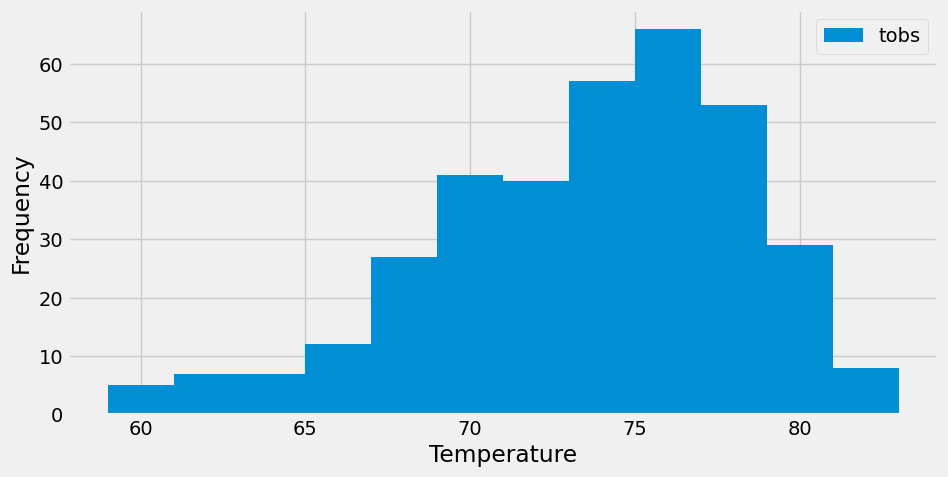

In [240]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_year = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2016-08-23").all()
tobs_df = pd.DataFrame(tobs_year, columns=["tobs"])
tobs_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [241]:
# Close Session
session.close()
